In [27]:
"""
Authors      : Aditya Jain and Safwan Jamal
Date started : November 8, 2022
About        : Convex Optimization project; code for solving convex opt problem
"""

import os
import glob
import numpy as np
import pickle
import cvxpy as cp
import seaborn as sns

#### Reading dissimilarity data data

In [28]:
filename = open('cat_dissimilarity_matrix_4x4.pickle', 'rb')
D        = pickle.load(filename)
n        = len(D)

#### Optimization program

In [29]:
print(D)
lambda_max = 0
for i in range(n):
  for j in range(i+1, n):
      lambda_cur = (np.sqrt(n)/2 ) * ((np.linalg.norm(D[i, :] - D[j, :])**2)/np.sum((D[i, :] - D[j, :])))
      print(f'Current lambda is {lambda_cur}')

      if lambda_cur>lambda_max:
        lambda_max = lambda_cur

print(f'Maximum lambda is {lambda_max}')

[[0.         0.85466998 1.         0.87144546]
 [0.85466998 0.         0.98177628 0.73776459]
 [1.         0.98177628 0.         0.84008227]
 [0.87144546 0.73776459 0.84008227 0.        ]]
Current lambda is 9.737191877056718
Current lambda is -21.06824824604567
Current lambda is 5.628413366438052
Current lambda is -7.91188032526578
Current lambda is 8.877400822707664
Current lambda is 3.9926979551787367
Maximum lambda is 9.737191877056718


In [30]:
# variable definitions
Z        = cp.Variable((n, n), symmetric=True)
lambda_t = 0.1*9.73


# objective function
cost_encoding = cp.trace(D.T@Z)        # cost of encoding all data points using representatives
cost_no_repr  = 0                      # cost associated with no. of representatives
for i in range(n):
    cost_no_repr += cp.norm2(Z[i, :])
cost_no_repr = lambda_t*cost_no_repr
objective    = cp.Minimize(cost_encoding + cost_no_repr)

# constraints
# probab. should be >=0
# probabilities should sum to one for every column
constraints = [Z>=0, np.ones((1,n))@Z == np.ones((1,n))]

# optimization program
prob = cp.Problem(objective, constraints)
prob.solve()

3.817564494160292

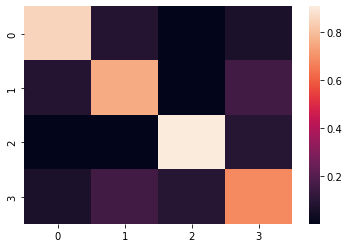

In [31]:
sns.heatmap(Z.value)

In [32]:
Z.value

array([[8.50859378e-01, 8.52958588e-02, 1.08570283e-09, 6.38447619e-02],
       [8.52958588e-02, 7.58298791e-01, 1.56068294e-09, 1.56405348e-01],
       [1.08570283e-09, 1.56068294e-09, 9.07517009e-01, 9.24829879e-02],
       [6.38447619e-02, 1.56405348e-01, 9.24829879e-02, 6.87266902e-01]])